<a href="https://colab.research.google.com/github/YoushaAdib/Python-Portfolio/blob/main/Benford's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Function for Benford's Law
def benfords_law_distribution(): 
  digits = range(1,10)
  distribution = [np.log10(1+1/d) for d in digits]
  return dict(zip(digits, distribution))

In [13]:
# Function to Calculate First Digits
def first_digit_distribution(data):
    first_digits = []
    for x in data:
        if x != 0 and x != "":
            try:
                first_digits.append(int(str(abs(float(x)))[0]))
            except ValueError:
                continue
    unique_digits, counts = np.unique(first_digits, return_counts=True)
    return dict(zip(unique_digits, counts / len(first_digits)))


In [31]:
def plot_distributions(actual, expected):
    digits = range(1, 10)
    actual_values = [actual.get(d, 0) for d in digits]
    expected_values = [expected[d] for d in digits]

    plt.bar(digits, actual_values, alpha=0.7, label="Actual")
    plt.plot(digits, expected_values, 'r', marker='o', label="Expected (Benford's Law)")
    plt.xlabel('First Digit')
    plt.ylabel('Probability')
    plt.title("Benford's Distribution")
    plt.legend()
    plt.xticks(digits, [str(d) for d in digits])
    plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/1_UK/1_Yousha Adib/6_Portfolio Projects/Benfords Law/BL.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


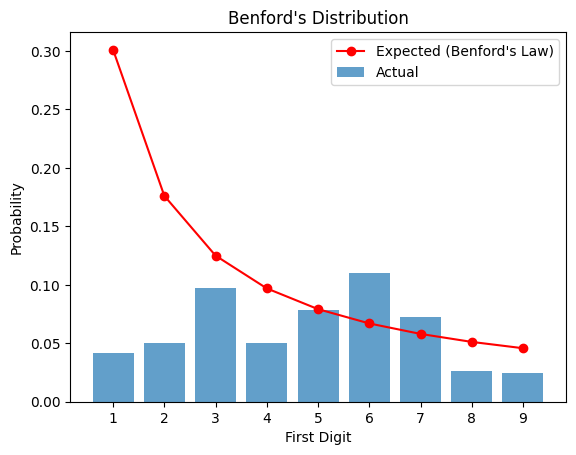

In [32]:
column_to_analyse = 'Value '
sample_data = data[column_to_analyse].values

actual_distribution = first_digit_distribution(sample_data)
expected_distribution = benfords_law_distribution()
plot_distributions(actual_distribution, expected_distribution)